# Photoionization / radiative recombination + dielectronic recombination

- data:
  - photoionization: INASAN
  - radiative recombination: INASAN
  - dielectronic recombination: INASAN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lss

from utils import *

In [5]:
elements = [
    lss.O1Inasan(),
    lss.O2Inasan(),
]
"""
13S3S - fast level
12P1D4 - 
"""
# elements[0].keys = elements[0].all_keys; elements[1].keys = elements[1].all_keys
elements[0].keys = ["12P3P4"]; elements[1].keys = ["22P4S"]

population_nlte_1 = np.zeros(sum([len(el.keys) for el in elements]))
population_nlte_1[1] = 1e-20
population_nlte_1[0] = 1.0 - population_nlte_1[1]
# population_nlte_1[0] = 0.0
# population_nlte_1[1] = 1.0

count = int(1e3)
temperatures = np.full(count, 1.0e4)
electron_temperatures = temperatures
electron_number_densities = np.geomspace(1.0e1, 1.0e30, num=count)
optical_depth = 0.0

# delta_time = 0.01
delta_time = 1.0e-4

In [6]:
ri_balance = [
    Transition.RBF_INASAN_O1,
]

b_factors = calculate_b_factors(
    elements=elements,
    population_nlte_1=population_nlte_1,
    temperatures=temperatures,
    electron_temperatures=electron_temperatures,
    electron_number_densities=electron_number_densities,
    optical_depth=optical_depth,
    delta_time=delta_time,
    transitions_types=[
        *ri_balance,
    ]
)

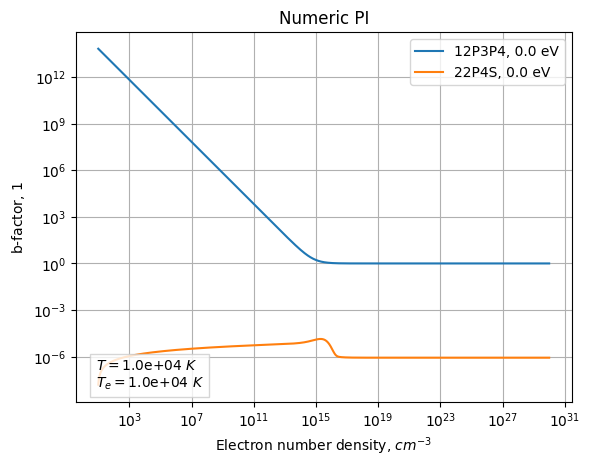

In [7]:
fig, ax = plt.subplots()

for s, element in enumerate(elements):
    for i, key in enumerate(element.keys):
        plt.plot(
            electron_number_densities,
            b_factors.T[i + sum([len(el.keys) for el in elements][:s])],
            label=f"{key}, {'{:.1f}'.format(element.levels[i].energy)} eV",
        )
plt.legend()
plt.grid()
plt.title("Numeric PI")
plt.xlabel("Electron number density, $cm^{{-3}}$")
plt.ylabel("b-factor, $1$")
plt.xscale("log")
plt.yscale("log")
plt.text(
    0.04,
    0.04,
    f"$T = ${'{:.1e}'.format(temperatures[0])} $K$\n"
    f"$T_e = ${'{:.1e}'.format(electron_temperatures[0])} $K$",
    transform = ax.transAxes,
    bbox={'facecolor': 'white', 'alpha': 0.8, 'edgecolor': (0.8, 0.8, 0.8)}
)
plt.show()